<a href="https://colab.research.google.com/github/AD-2007-C/Clustering-of-Flower-Species/blob/main/Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

iris=load_iris()
df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
y=iris.target

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**KMEANS**

In [ ]:

kmeans=KMeans(n_clusters=3, random_state=42)
y_pred= kmeans.fit_predict(df)
y_pred

array([2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

**Only looking at petal length and width, we can see 1: smallest- so setosa; 2: larger so versicular and 0: largest so virginica**

In [ ]:
kmeans.labels_
df['cluster']=kmeans.labels_
df['species']=y
df['cluster'].unique()




array([2, 0, 1], dtype=int32)

In [ ]:
print(kmeans.labels_[:150])
print(kmeans.inertia_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
78.85566582597727


ELBOW METHOD

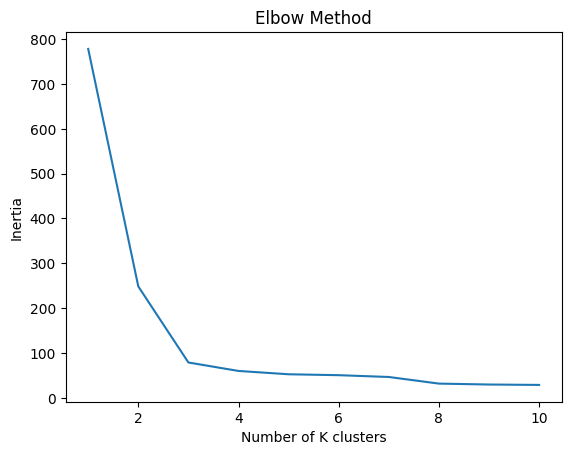

In [ ]:
import matplotlib.pyplot as plt
inertia=[]
K= range(1,11)
for k  in K:
  kmeans=KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df)
  inertia.append(kmeans.inertia_)

plt.plot(range(1,11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of K clusters')
plt.ylabel('Inertia')
plt.show()

There is a huge dip from k=2-3 and then it flattens out.

SILHOUTTE SCORE


In [ ]:
from sklearn.metrics import silhouette_score
q= range(2,6)
for k in q:
  kmeans=KMeans(n_clusters=k, random_state=42).fit(df)
  score=silhouette_score(df, kmeans.labels_)
  print(f"k = {k}, score= {score}")





k = 2, score= 0.6203026485078931
k = 3, score= 0.68468524942902
k = 4, score= 0.5764650670952605
k = 5, score= 0.44814868401010083


Clearly k=3 has the best score as scores above 0.65 is considered great.

In [ ]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,clusters,species
145,6.7,3.0,5.2,2.3,0,3,2
146,6.3,2.5,5.0,1.9,2,0,2
147,6.5,3.0,5.2,2.0,0,3,2
148,6.2,3.4,5.4,2.3,0,3,2
149,5.9,3.0,5.1,1.8,2,0,2


In [ ]:
cluster_to_species={
    0:'virginica',
    1:'setosa',
    2:'vesticular'

}
df['cluster_names'] = df['clusters'].map(cluster_to_species)

PLOTTING- We do not need PCA here as we can choose 2 features- Petal Length and Petal Width.

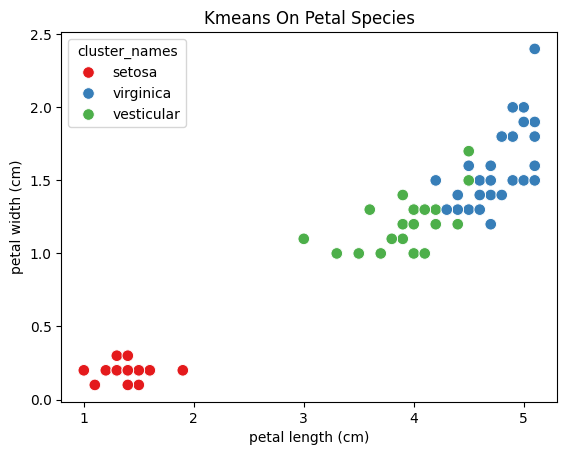

In [ ]:
import seaborn as sns
sns.scatterplot(df, x='petal length (cm)', y='petal width (cm)', hue='cluster_names', palette='Set1',s=70)
plt.title('Kmeans On Petal Species')
plt.show()

**DBSCAN**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

scaler= StandardScaler()
df_scaled= scaler.fit_transform(iris.data)

In [ ]:
dbscan=DBSCAN(eps=0.47701, min_samples=5)
dbscan.fit(df_scaled)
dbscan.labels_


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        2,  2,  2, -1, -1, -1, -1, -1,  2,  1,  2, -1, -1, -1,  2, -1, -1,
       -1,  2, -1, -1,  1,  2, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
       -1,  2, -1,  2,  2,  2,  1,  2,  2,  2, -1,  2, -1, -1])

In [ ]:
df['dbscan_cluster'] = dbscan.labels_
df['dbscan_cluster'].unique()
df['dbscan_cluster'].value_counts()






,count
dbscan_cluster,
0,45
1,45
-1,44
2,16


In [ ]:
df['dbscan_cluster'].mean()

np.float64(0.22)

In [ ]:
cluster_new={
    -1:'Outliers',
    0:'Setosa',
    1:'Versicular',
    2:'Viriginica'

}
df['dbscan_cluster_names']= df['dbscan_cluster'].map(cluster_new)


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

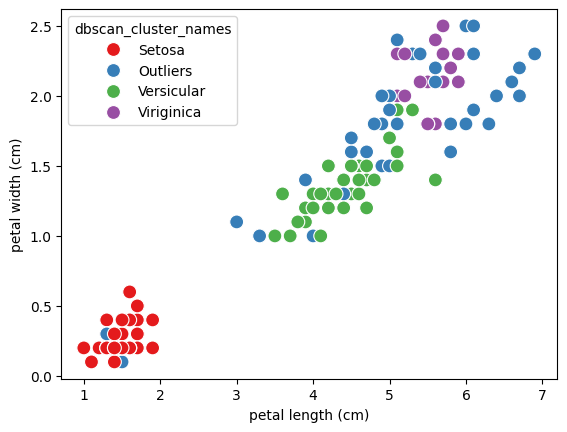

In [ ]:
sns.scatterplot(
    data=df,
    x='petal length (cm)',
    y='petal width (cm)',
    hue='dbscan_cluster_names',
    palette='Set1',
    s=100
)

A conclusion from this dataset is that KMeans was better fit on this than DBSCAN due to number of outliers produced. DBSCAN is only useful when there is a lot of noise in the dataset.